In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

##### Load Data

In [20]:
X, Y = load_coffee_data()
print(f"type of X: {type(X)}")
print(X.shape, Y.shape)

(200, 2) (200, 1)


##### Plot Data

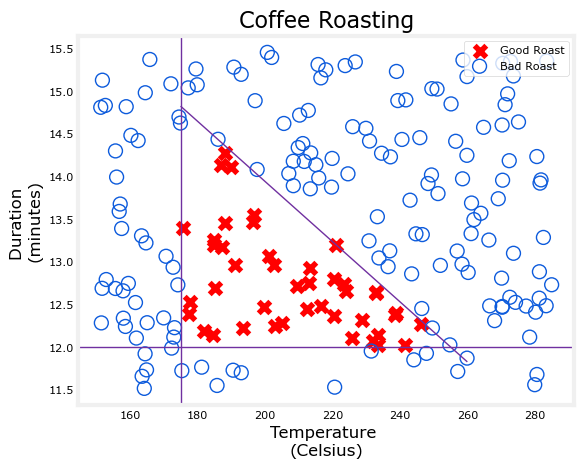

In [10]:
plt_roast(X, Y)

##### Normalize Data

In [21]:
print(f"Before normalization temperature ranges from {np.min(X[:,0])} to {np.max(X[:,0])}")
print(f"Before normalization duration ranges from {np.min(X[:,1])} to {np.max(X[:,1])}")

# Normalize the data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)
X_norm = normalizer(X)

print(f"After normalization temperature ranges from {np.min(X_norm[:,0])} to {np.max(X_norm[:,0])}")
print(f"After normalization duration ranges from {np.min(X_norm[:,1])} to {np.max(X_norm[:,1])}")

Before normalization temperature ranges from 151.32372212128612 to 284.99434167453603
Before normalization duration ranges from 11.512747082472469 to 15.454206928801511
After normalization temperature ranges from -1.6852184534072876 to 1.6597541570663452
After normalization duration ranges from -1.6996712684631348 to 1.793238878250122


In [22]:
# Define the activation function
g = sigmoid

In [43]:
def my_dense(a_in, W, b):
    """
    Computes dense layer
    Args: 
        a_in (ndarray(n, )): Data, 1 example
        W (ndarray(n, j)): Weight matrix, n features per unit, j units, j are the no. neurons in this layer.
        b (ndarray(j, )): bias vector, j units
    Returns:
        a_out: (ndarray(j, ))
    """
    # No. of neurons
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        a_out[j] = sigmoid(np.dot(w, a_in) + b[j])
    return a_out

In [44]:
def my_sequential(x, W1, b1, W2, b2):
    a_1 = my_dense(x, W1, b1)
    a_2 = my_dense(a_1, W2, b2)
    return(a_2)

##### Copying the output weights and bias for each layer from lab1

In [45]:
W1_temp = np.array([[-12.199,  16.022,  -0.199], [-0.256,  13.358,  -9.512]])
b1_temp = np.array([-13.171,   2.284, -11.74 ])
W2_temp = np.array([[-73.85 ], [-61.037], [-70.274]])
b2_temp = np.array([41.825])


##### Prediction

In [46]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    n = X.shape[1]
    pred = np.zeros((m, 1))
    for i in range(m):
        pred[i, 0] = my_sequential(X[i], W1, b1, W2, b2)
    return(pred)

In [49]:
X_tst = np.array([[200,13.9], [200,17]]) 
X_tst_norm = normalizer(X_tst)


predictions = my_predict(X_tst_norm, W1_temp, b1_temp, W2_temp, b2_temp)

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


/var/folders/yv/b8k8yx4d7kjggqgzy_9_2dwc0000gp/T/ipykernel_26440/4118307.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i, 0] = my_sequential(X[i], W1, b1, W2, b2)


/var/folders/yv/b8k8yx4d7kjggqgzy_9_2dwc0000gp/T/ipykernel_26440/4118307.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i, 0] = my_sequential(X[i], W1, b1, W2, b2)


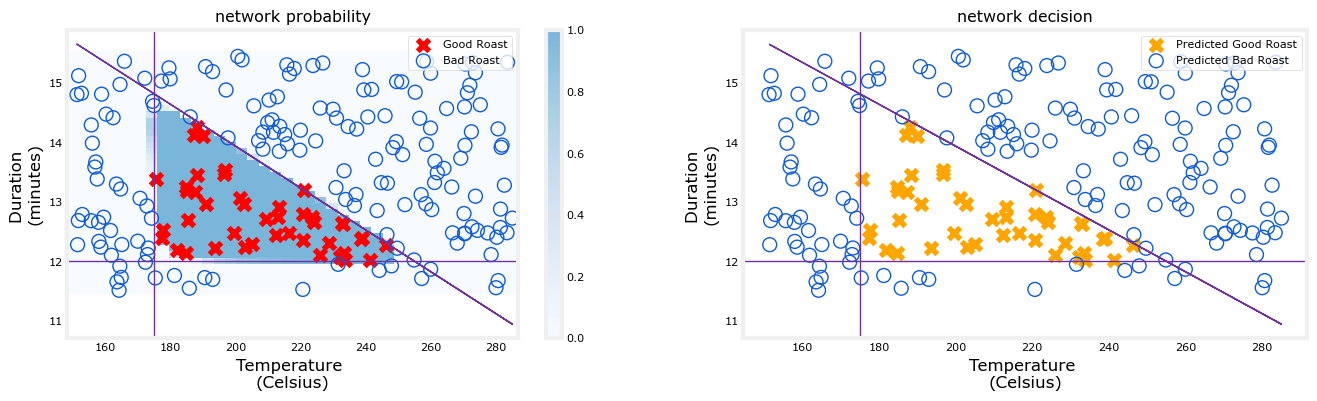

In [51]:
netf= lambda x : my_predict(normalizer(x), W1_temp, b1_temp, W2_temp, b2_temp)
plt_network(X,Y,netf)